Import modules

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

SVM for linearly separable dataset

In [2]:
col_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
     
data = pd.read_csv("auth_bill.csv", header=None, names=col_names)

data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,-1
1,4.54590,8.1674,-2.4586,-1.46210,-1
2,3.86600,2.6383,1.9242,0.10645,-1
3,3.45660,9.5228,-4.0112,-3.59440,-1
4,0.32924,4.4552,4.5718,-0.98880,-1


X_training and y_training

In [3]:
X1 = data['Variance']
X2 = data['Skewness']

X_training = np.array(list(zip(X1,X2)))
X_training

array([[  3.6216  ,   8.6661  ],
       [  4.5459  ,   8.1674  ],
       [  3.866   ,   2.6383  ],
       [  3.4566  ,   9.5228  ],
       [  0.32924 ,   4.4552  ],
       [  4.3684  ,   9.6718  ],
       [  3.5912  ,   3.0129  ],
       [  2.0922  ,   6.81    ],
       [  3.2032  ,   5.7588  ],
       [  1.5356  ,   9.1772  ],
       [  1.2247  ,   8.7779  ],
       [  3.9899  ,   2.7066  ],
       [  1.8993  ,   7.6625  ],
       [ -1.3971  ,   3.3191  ],
       [  0.39012 ,  -0.14279 ],
       [ -1.6677  ,  -7.1535  ],
       [ -3.8483  , -12.8047  ],
       [ -3.5681  ,  -8.213   ],
       [ -2.2804  ,  -0.30626 ],
       [ -1.7582  ,   2.7397  ],
       [ -0.89409 ,   3.1991  ],
       [  0.3434  ,   0.12415 ],
       [ -0.9854  ,  -6.661   ],
       [ -2.4115  ,  -9.1359  ],
       [ -1.5252  ,  -6.2534  ],
       [ -0.61442 ,  -0.091058],
       [ -0.36506 ,   2.8928  ],
       [ -5.9034  ,   6.5679  ]])

In [4]:
y_training = data['Class']
y_training

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: Class, dtype: int64

In [6]:
target_names = ['-1', '+1']
target_names

['-1', '+1']

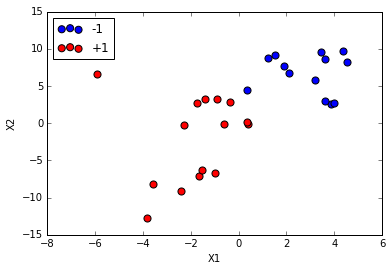

In [7]:
xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index
plt.scatter(X_training[xx, 0], X_training[xx, 1], c = 'b', s = 50)
plt.scatter(X_training[yy, 0], X_training[yy, 1], c = 'r', s = 50)

plt.legend(target_names, loc = 2)
plt.xlabel('X1')
plt.ylabel('X2')

Support Vector Machine training

In [8]:
from sklearn import svm, datasets
svc = svm.SVC(kernel = 'linear').fit(X_training, y_training)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
svc.get_params(True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The boundary of the plot

In [10]:
X1_min = math.floor(min(X_training[:,0]))-1
X1_max = math.ceil(max(X_training[:,0]))+1
X2_min = math.floor(min(X_training[:,1]))-1
X2_max = math.ceil(max(X_training[:,1]))+1
[X1_min, X1_max, X2_min, X2_max]

[-7, 6, -14, 11]

Linear Kernel

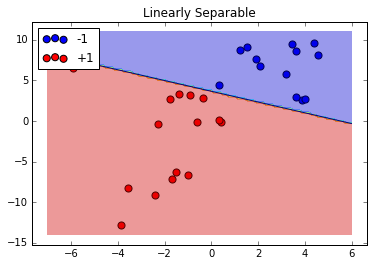

In [11]:
xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index

plt.scatter(X_training[xx, 0], X_training[xx, 1], c = 'b', s = 50)
plt.scatter(X_training[yy, 0], X_training[yy, 1], c = 'r', s = 50)

plt.legend(target_names, loc = 2)

X, Y = np.mgrid[X1_min:X1_max:100j, X2_min:X2_max:100j]
Z = svc.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0, alpha = 0.4)
plt.contour(X,Y,Z, color = ['k'], linestyles = ['-'], levels = [0])

plt.title('Linearly Separable')

The Margin plot

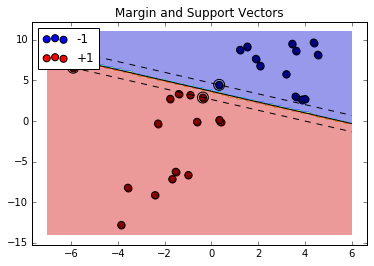

In [12]:
xx = y_training[y_training<0].index
yy = y_training[y_training>0].index
plt.scatter(X_training[xx,0],X_training[xx,1],c='b',s=50)
plt.scatter(X_training[yy,0],X_training[yy,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[X1_min:X1_max:100j,X2_min:X2_max:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')

Support Vectors

In [13]:
svc.support_

array([ 4, 26, 27], dtype=int32)

In [14]:
svc.support_vectors_

array([[ 0.32924,  4.4552 ],
       [-0.36506,  2.8928 ],
       [-5.9034 ,  6.5679 ]])

In [15]:
weight = svc.coef_
intercept = svc.intercept_
a = -weight[0,0] / weight[0, 1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= -0.663574262661  * x1 +  3.66212340171


In [16]:
svc.score(X_training, y_training)

1.0

In [17]:
y_pred = svc.predict(X_training)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
y_true = y_training
y_true

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: Class, dtype: int64

In [19]:
metric.accuracy_score(y_true, y_pred, normalize = False)

28

In [20]:
cnf_matrix = metric.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[13,  0],
       [ 0, 15]])

SVM prediction

In [23]:
svc.predict([[4, 7]])

array([-1])

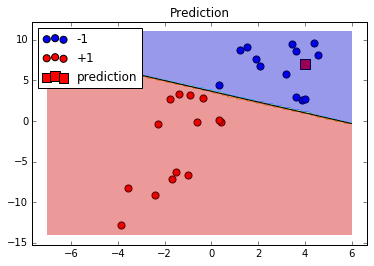

In [24]:


xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index

plt.scatter(X_training[xx, 0],X_training[xx, 1], c='b', s=50)
plt.scatter(X_training[yy, 0],X_training[yy, 1], c='r', s=50)


plt.scatter(4, 7, c='r', marker='s', s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[X1_min:X1_max:100j,X2_min:X2_max:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')